In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import random
from sklearn.metrics import balanced_accuracy_score, precision_score, recall_score, accuracy_score
!pip install -U mlxtend
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

     |████████████████████████████████| 1.3MB 9.0MB/s 
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [0]:
def load(path):
    from google.colab import drive
    drive.mount('/gdrive')
    data_dir = '/gdrive/My Drive/Studia/INZYNIERKA/StockPricePrediction/data/'
    with open(data_dir + path, 'rb') as handle:
        data = pickle.load(handle)
    return data

In [0]:
def save(path, data):
    from google.colab import drive
    drive.mount('/gdrive')
    data_dir = '/gdrive/My Drive/Studia/INZYNIERKA/StockPricePrediction/data/'
    with open(data_dir + path, 'wb') as handle:
        pickle.dump(data, handle)

In [5]:
train_x, train_y, val_x, val_y, test_x, test_y = load('input/data_lookback_1_notscaled.pickle')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [6]:
print('train', train_y[train_y == 1].shape, ' 0: ', train_y[train_y == 0].shape)
print('val', val_y[val_y == 1].shape, ' 0: ', val_y[val_y == 0].shape)
print('test', test_y[test_y == 1].shape, ' 0: ', test_y[test_y == 0].shape)

train (713,)  0:  (661,)
val (85,)  0:  (87,)
test (86,)  0:  (86,)


In [7]:
count_1 = 0
count_0 = 0
for data_y in [train_y, val_y, test_y]:
    count_1 += data_y[data_y == 1].shape[0]
    count_0 += data_y[data_y == 0].shape[0]
print('1 -> ', count_1)
print('0 -> ', count_0)
all_counts = count_0 + count_1
weight_1 = count_1 / all_counts
weight_0 = count_0 / all_counts
weight_1

1 ->  884
0 ->  834


0.5145518044237486

In [8]:
#PSEUDO RANODM MODEL
predictions_list = []
set_lens, acc_all, prec_all, rec_all, conf_all = [], [], [], [], []
for x in range(1000):
    predictions = random.choices([0, 1], weights=[weight_0, weight_1], k=test_y.shape[0])
    predictions_list.append(predictions)

    prec = precision_score(test_y, predictions)
    rec = recall_score(test_y, predictions)
    acc = accuracy_score(test_y, predictions)
    # print(f"Accuracy: {round(acc * 100,2)}%")
    # print(f"precision: {round(prec * 100,2)}%")
    # print(f"recall: {round(rec * 100,2)}%")
    acc_all.append(acc)
    prec_all.append(prec)
    rec_all.append(rec)

print(f"Accuracy: {round(np.mean(acc_all) * 100,2)}%")
print(f"precision: {round(np.mean(prec_all) * 100,2)}%")
print(f"recall: {round(np.mean(rec_all) * 100,2)}%")

Accuracy: 49.89%
precision: 49.88%
recall: 51.27%


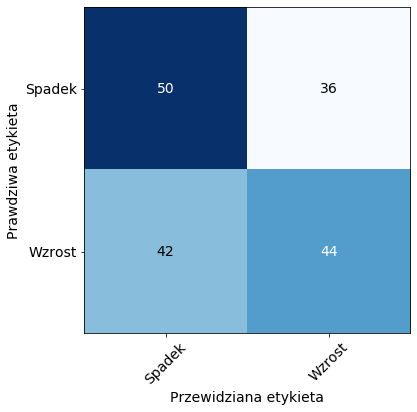

In [9]:
plt.rcParams.update({'font.size': 14})
cm = confusion_matrix(y_target=test_y, 
                    y_predicted=predictions)

fig, ax = plot_confusion_matrix(conf_mat=cm,
                                class_names=['Spadek', 'Wzrost'],
                                figsize=(6,6))
_= plt.ylabel('Prawdziwa etykieta')
_ = plt.xlabel('Przewidziana etykieta')

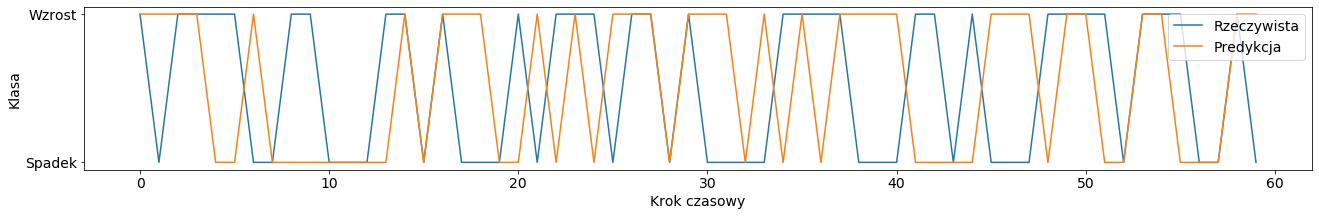

In [10]:
def plot_predictions(length=60):
    fig = plt.figure(figsize=(22,3))
    idx = np.random.randint(test_y.shape[0], size=length)
    plt.plot(test_y[idx])
    plt.plot(np.array(predictions)[:length])
    plt.legend(['Rzeczywista', 'Predykcja'], loc=1)
    plt.xlabel('Krok czasowy')
    plt.ylabel('Klasa')
    plt.yticks([0, 1], ['Spadek', 'Wzrost'])

plot_predictions()


In [11]:
print(len(predictions))
save('predictions/pseudo_random.pickle', predictions_list)

172
Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
